# AV – TRABALHO: FASE 2 – Preparação e análise exploratória de dados

**Alunos:**
- Bruno Eduardo Procopiuk Walter
- Bruno Gonzaga Santos

**Tarefas:**
1. Realizar join na ferramenta HIVE dos datasets a serem analisados: *ommlbd_basico, ommlbd_renda, ommlbd_empresarial, ommlbd_familiar, ommlbd_regional* e gerar um dataset completo para os próximos passos.
2. Limpeza: Remover campos do dataset que tenham correlação fora das regras ou que sejam impedido pelas legislações informadas
4. Testar médias das variaveis escolhidas
3. Normalizar valores dos campos escolhidos
5. Separar dataset de treino e teste
6. Gerar novos datasets para próximos passos

## Obtendo os dados

Para obter um dataset consolidado para se trabalhar neste notebook, foram seguidos os seguintes passos no ambiente do Ambari.

1. Upload de todos os arquivos .csv em tabelas no Hive
2. Join das tabelas através do comando: 
```sql 
hive -e 'SELECT * FROM brunos.ommlbd_basico ob JOIN brunos.ommlbd_empresarial oe ON (ob.hs_cpf = oe.hs_cpf) JOIN brunos.ommlbd_familiar oa ON (ob.hs_cpf = oa.hs_cpf) JOIN brunos.ommlbd_regional og ON (ob.hs_cpf = og.hs_cpf) JOIN brunos.ommlbd_renda od ON (ob.hs_cpf = od.hs_cpf);' | sed 's/[[:space:]]\+/,/g' > ~/score.csv
```
Observe que o comando em questão já tem como saída o arquivo .csv a ser usado na sequencia.


## Preparação e análise exploratória de dados
1. Ler arquivo de join do HIVE;
2. Inserir headers
3. Eliminar campos desnecessários
4. Separar entre treino e teste conforme planilha básica

In [1]:
# Realizando imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
plt.figure(figsize=(30, 18))

<Figure size 3000x1800 with 0 Axes>

### Ler arquivo de join gerado pelo HIVE

In [2]:
headers_basico = ['cpf_hash', 'safra', 'tempo_cpf', 'dist_centro_cidade', 'orientacao_sexual', 'religiao', 
                  'dist_zona_risco', 'qtd_endereco', 'qtd_email', 'qtd_celular', 'celular_procon', 'qtd_fone_fixo', 
                  'tel_fixo_procon', 'target']

In [3]:
headers_renda = ['HS_CPF2', 'estimativa_renda', 'qtd_declaracao_isenta', 'qtd_irpf_10', 'qtd_irpf_restituir_10', 
                 'qtd_irpf_pagar_10', 'restituicao_agencia_alta_renda', 'bolsa_familia', 'anos_ultima_restituicao', 
                 'anos_ultima_declaracao', 'anos_ultima_declaracao_pagar']

In [4]:
headers_empresarial = ['HS_CPF3', 'indice_emprego', 'porte_empregador', 'socio_empresa', 'funcionario_publico', 
                       'segmentacao', 'segmentacao_cobranca', 'segmentacao_ecommerce', 'segmentacao_financeira', 
                       'segmentacao_telecom']

In [5]:
headers_familiar = ['HS_CPF4', 'qtd_pessoas_casa', 'menor_renda_casa', 'maior_renda_casa', 'soma_renda_casa', 
                    'media_renda_casa', 'maior_idade_casa', 'menor_idade_casa', 'media_idade_casa', 'indice_menor_idade', 
                   'indice_cobranca_baixo', 'indice_cobranca_medio', 'indice_cobranca_alto', 'segmentacao_fin_baixa', 
                   'segmentacao_fin_media', 'segmentacao_fin_alta', 'bolsa_familia_casa', 'funcionario_publico_casa']

In [6]:
headers_regional = ['HS_CPF5', 'idade_media_cep', 'percent_masc_cep', 'percent_fem_cep', 'percent_analfabeto_cep', 
                   'percent_primario_cep', 'percent_fundamental_cep', 'percent_medio_cep', 'percent_superior_cep', 
                   'percent_mestrado_cep', 'percent_doutorado_cep', 'percent_bolsa_familia_cep', 
                   'percent_func_publico_cep', 'media_renda_cep', 'pib_municipio', 'qtd_utilitario_municipio', 
                   'qtd_automovel_municipio', 'qtd_caminhao_municipio', 'qtd_camionete_municipio', 'qtd_moto_municipio',
                   'percent_populacao_zona_urbana', 'idh_municipio']

In [7]:
headers = headers_basico + headers_empresarial + headers_familiar + headers_regional + headers_renda

In [8]:
df = pd.read_csv('datasets/score.csv', sep=';', names=headers)
df.head()

,cpf_hash,safra,tempo_cpf,dist_centro_cidade,orientacao_sexual,religiao,dist_zona_risco,qtd_endereco,qtd_email,qtd_celular,...,estimativa_renda,qtd_declaracao_isenta,qtd_irpf_10,qtd_irpf_restituir_10,qtd_irpf_pagar_10,restituicao_agencia_alta_renda,bolsa_familia,anos_ultima_restituicao,anos_ultima_declaracao,anos_ultima_declaracao_pagar
0,217413,TESTE,12,3347,HETERO,CATOLICA,962,1,0,1,...,900,0,0,0,0,0,0,-9998,-9998,-9998
1,659712,TESTE,20,0,HETERO,EVANGELICA,133905,1,0,1,...,400,2,0,0,0,0,0,-9998,12,-9998
2,558518,TESTE,27,2210,HETERO,CATOLICA,171360,1,1,3,...,6000,0,0,0,0,0,0,-9998,-9998,-9998
3,622015,TESTE,10,0,HETERO,CATOLICA,153737,1,0,3,...,1000,0,0,0,0,0,0,-9998,-9998,-9998
4,241872,TREINO,26,3162,HETERO,EVANGELICA,225,2,1,1,...,20000,0,4,3,0,0,0,8,4,-9998


In [9]:
# Verificando números de registros
print(df.shape)

(438924, 75)


In [ ]:
# Listando colunas
list(df.columns)

### Clean

In [10]:
# Removendo hash_cpf duplicadas
df.drop('HS_CPF2', inplace=True, axis=1)
df.drop('HS_CPF3', inplace=True, axis=1)
df.drop('HS_CPF4', inplace=True, axis=1)
df.drop('HS_CPF5', inplace=True, axis=1)

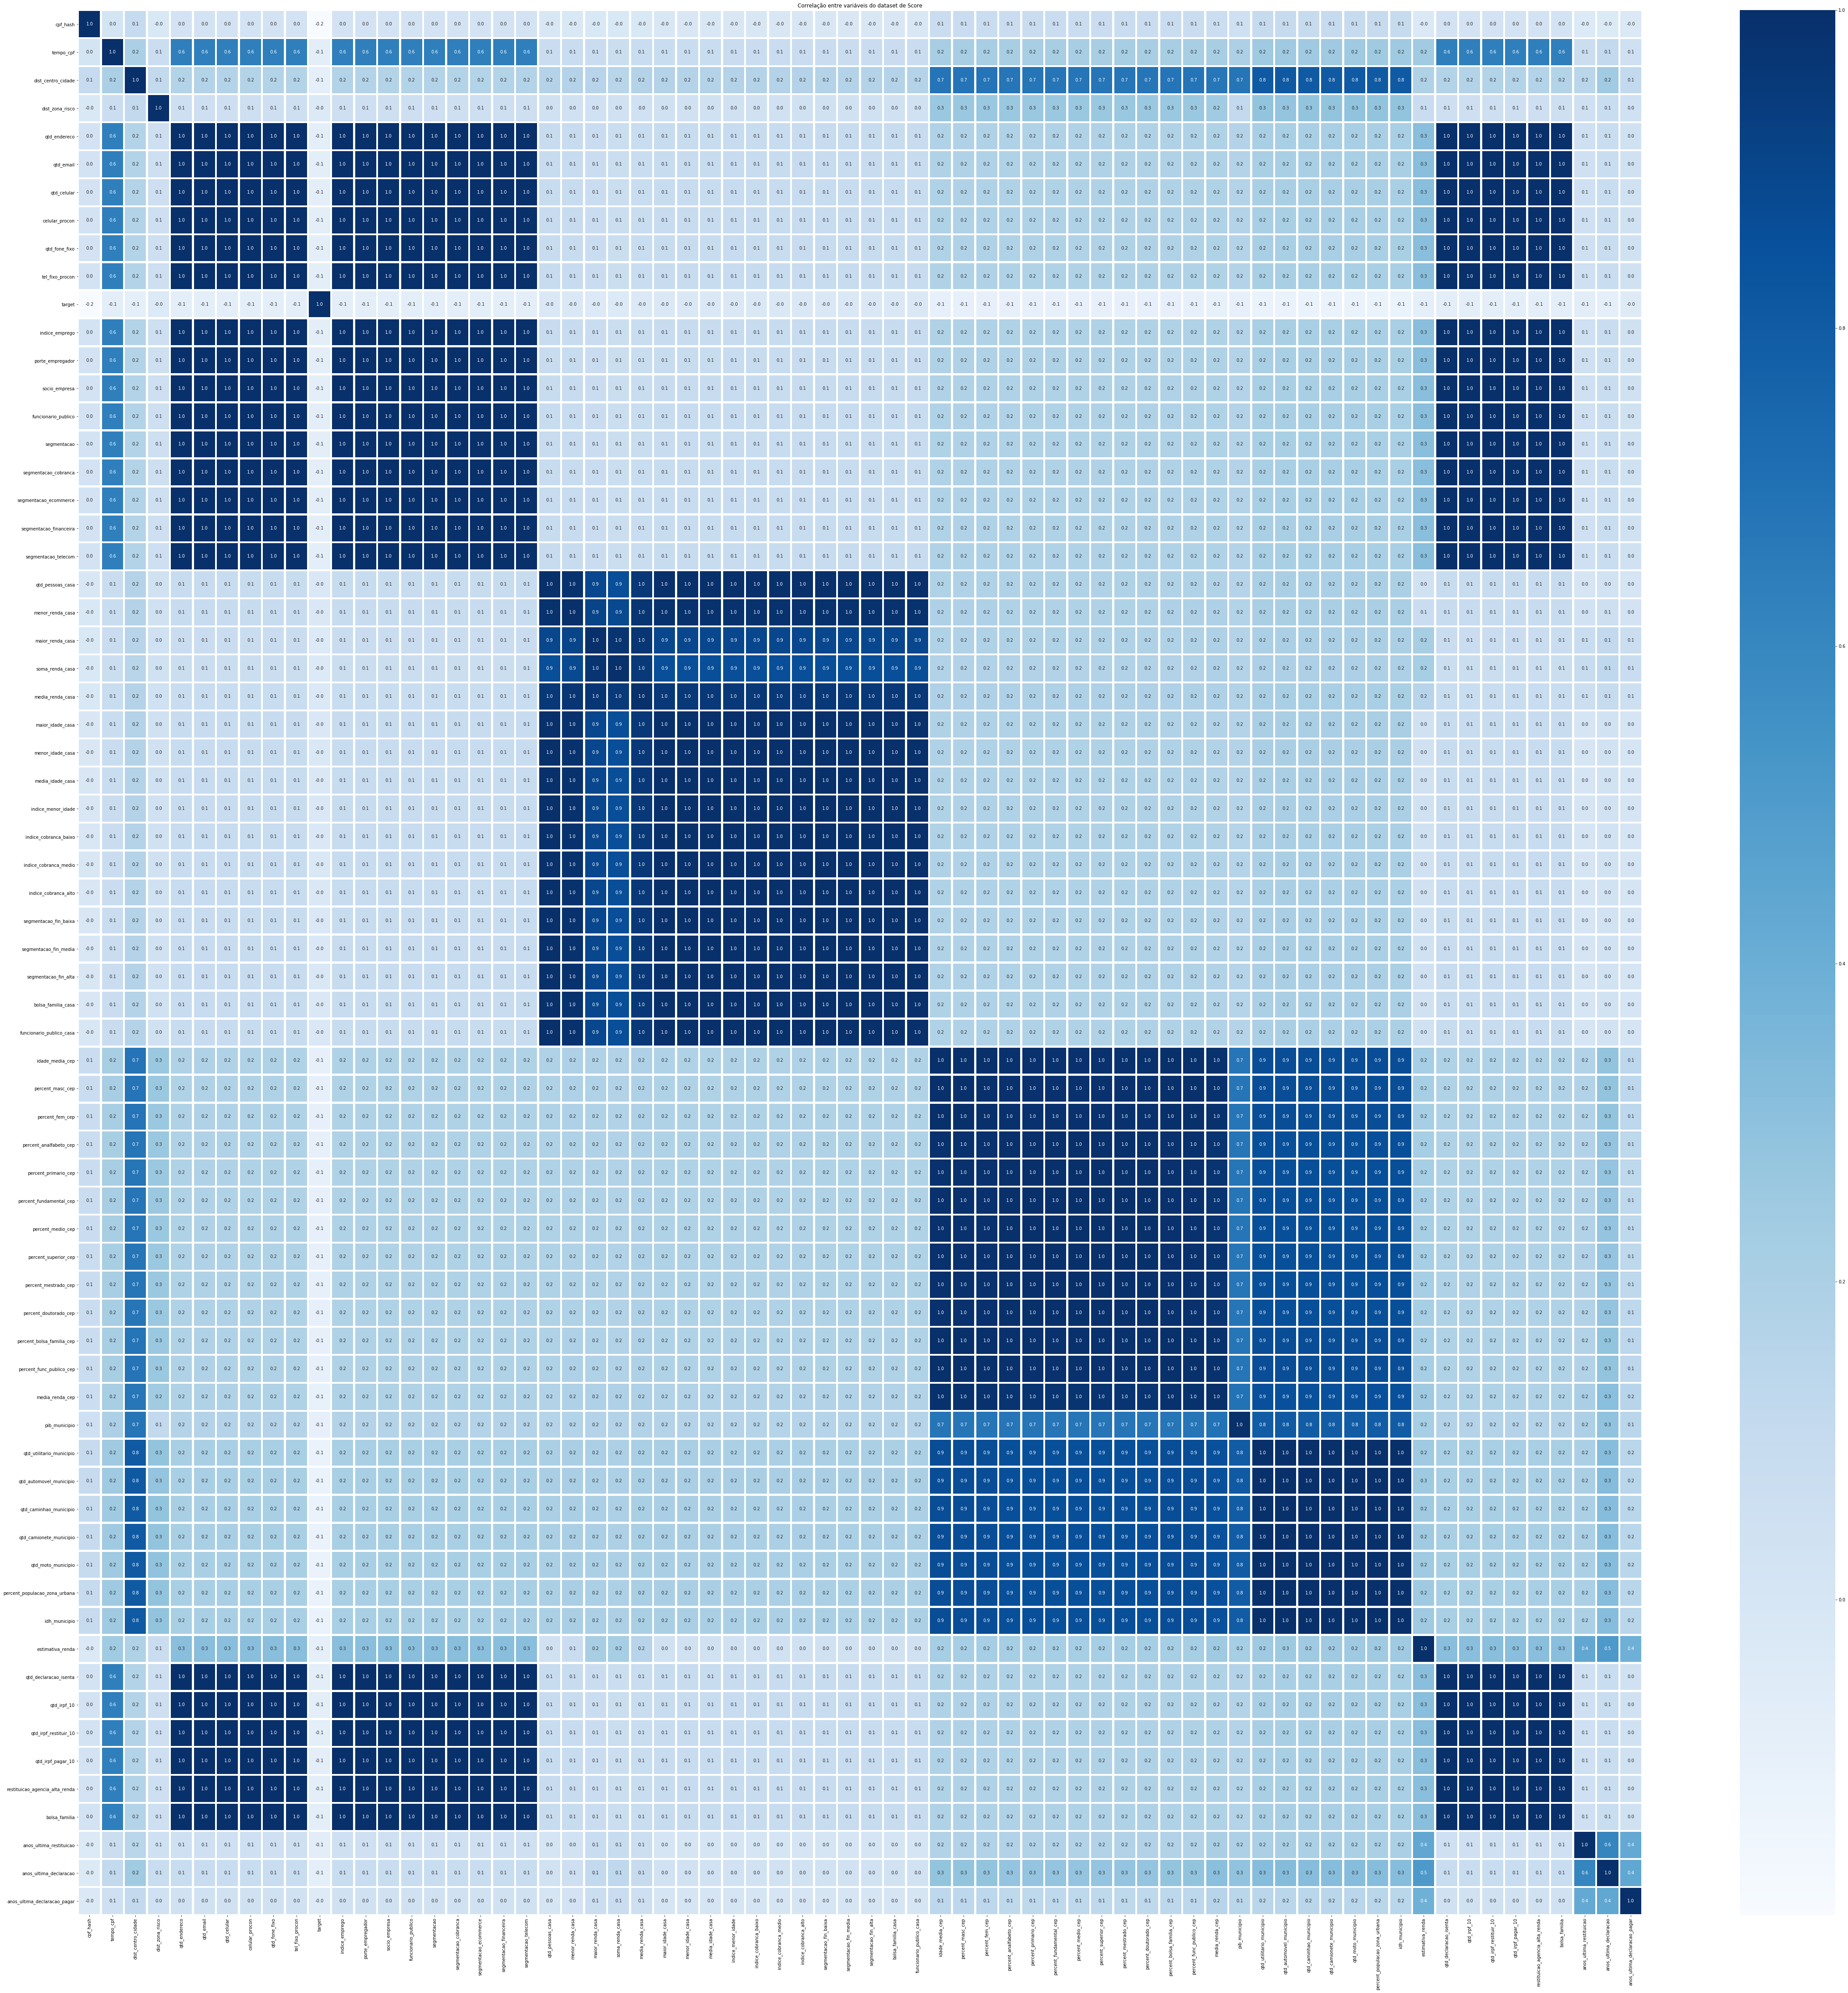

In [11]:
# Correlação entre variaveis
fig, ax = plt.subplots(figsize=(80,80))
sns.heatmap(df.corr(),
            annot = True,
            fmt = '.1f',
            cmap='Blues',
            linewidths=3.5,
            ax=ax)
plt.title('Correlação entre variáveis do dataset de Score')
plt.show()

In [12]:
# Removendo artributos sem correlação com classe alvo (target)
df.drop('qtd_pessoas_casa', inplace=True, axis=1)
df.drop('maior_idade_casa', inplace=True, axis=1)
df.drop('menor_idade_casa', inplace=True, axis=1)
df.drop('media_idade_casa', inplace=True, axis=1)
df.drop('maior_renda_casa', inplace=True, axis=1)
df.drop('menor_renda_casa', inplace=True, axis=1)
df.drop('media_renda_casa', inplace=True, axis=1)
df.drop('soma_renda_casa', inplace=True, axis=1)
df.drop('indice_menor_idade', inplace=True, axis=1)
df.drop('indice_cobranca_baixo', inplace=True, axis=1)
df.drop('indice_cobranca_medio', inplace=True, axis=1)
df.drop('indice_cobranca_alto', inplace=True, axis=1)
df.drop('segmentacao_fin_baixa', inplace=True, axis=1)
df.drop('segmentacao_fin_media', inplace=True, axis=1)
df.drop('segmentacao_fin_alta', inplace=True, axis=1)
df.drop('bolsa_familia_casa', inplace=True, axis=1)
df.drop('funcionario_publico_casa', inplace=True, axis=1)
df.drop('anos_ultima_declaracao_pagar', inplace=True, axis=1)
df.drop('dist_zona_risco', inplace=True, axis=1)


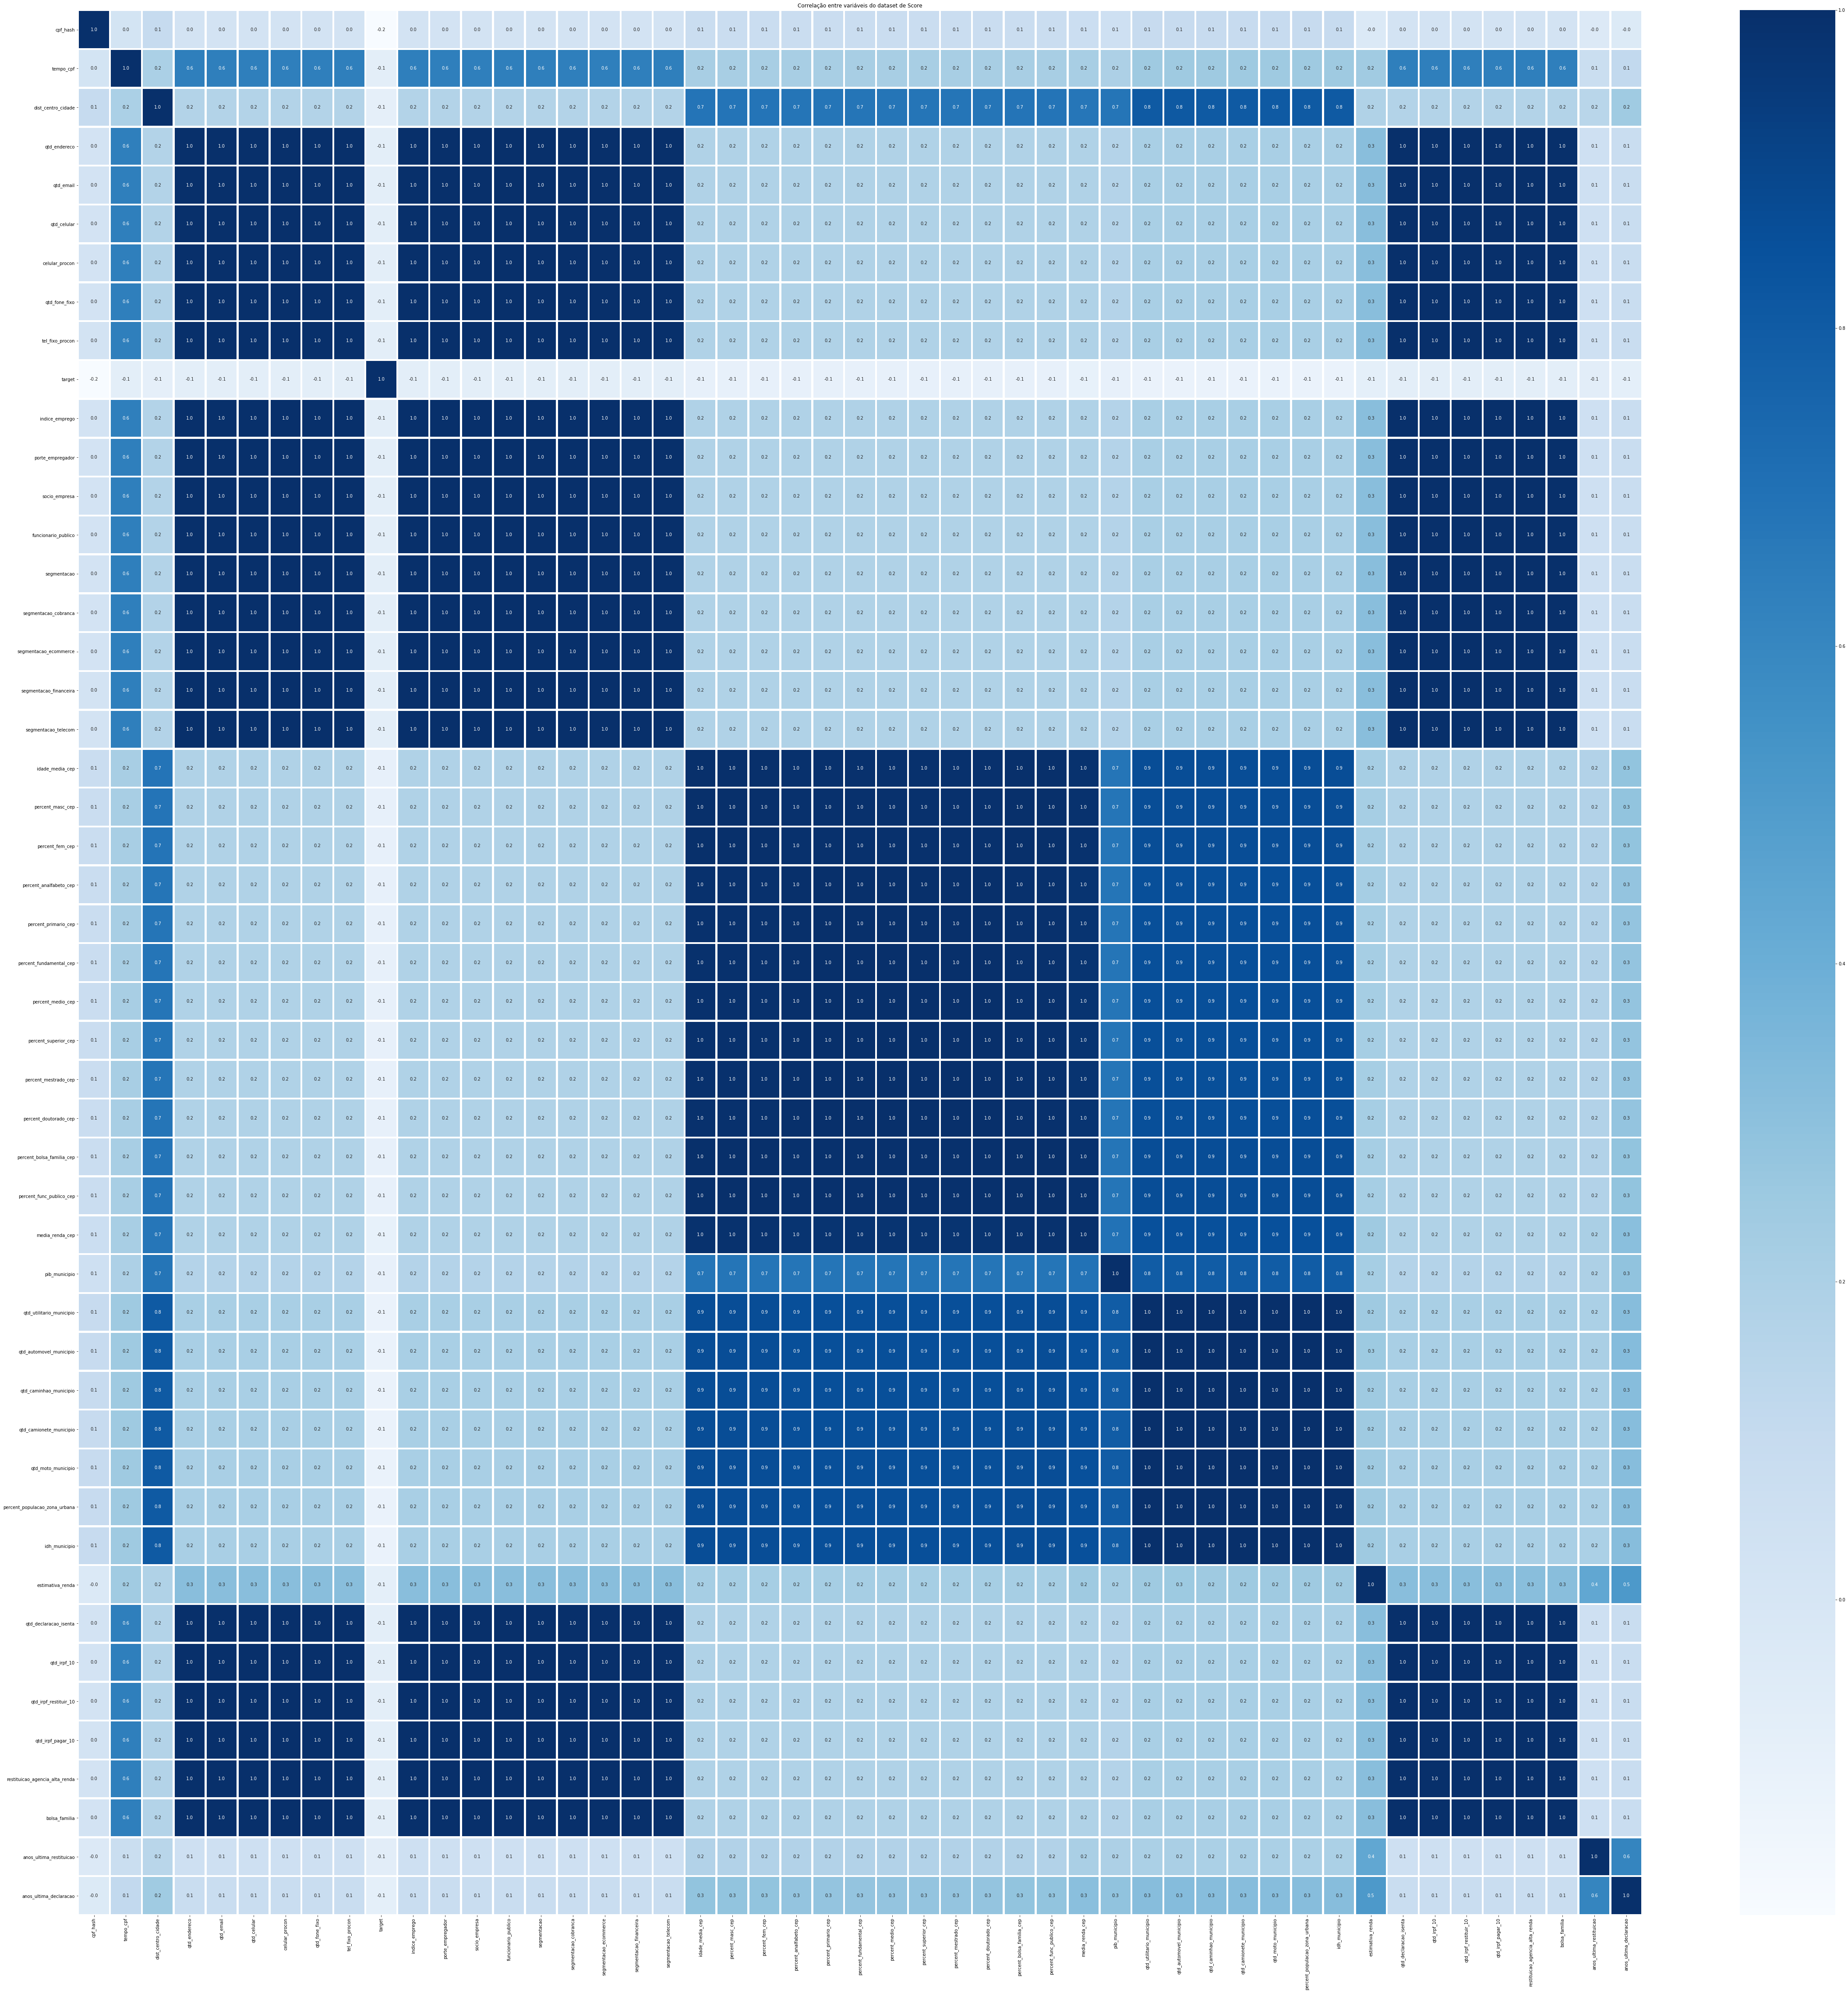

In [13]:
# Correlação entre variaveis
fig, ax = plt.subplots(figsize=(80,80))
sns.heatmap(df.corr(),
            annot = True,
            fmt = '.1f',
            cmap='Blues',
            linewidths=3.5,
            ax=ax)
plt.title('Correlação entre variáveis do dataset de Score')
plt.show()

In [14]:
# Removendo dados sensiveis
df.drop('orientacao_sexual', inplace=True, axis=1)
df.drop('religiao', inplace=True, axis=1)
df.drop('celular_procon', inplace=True, axis=1)
df.drop('bolsa_familia', inplace=True, axis=1)

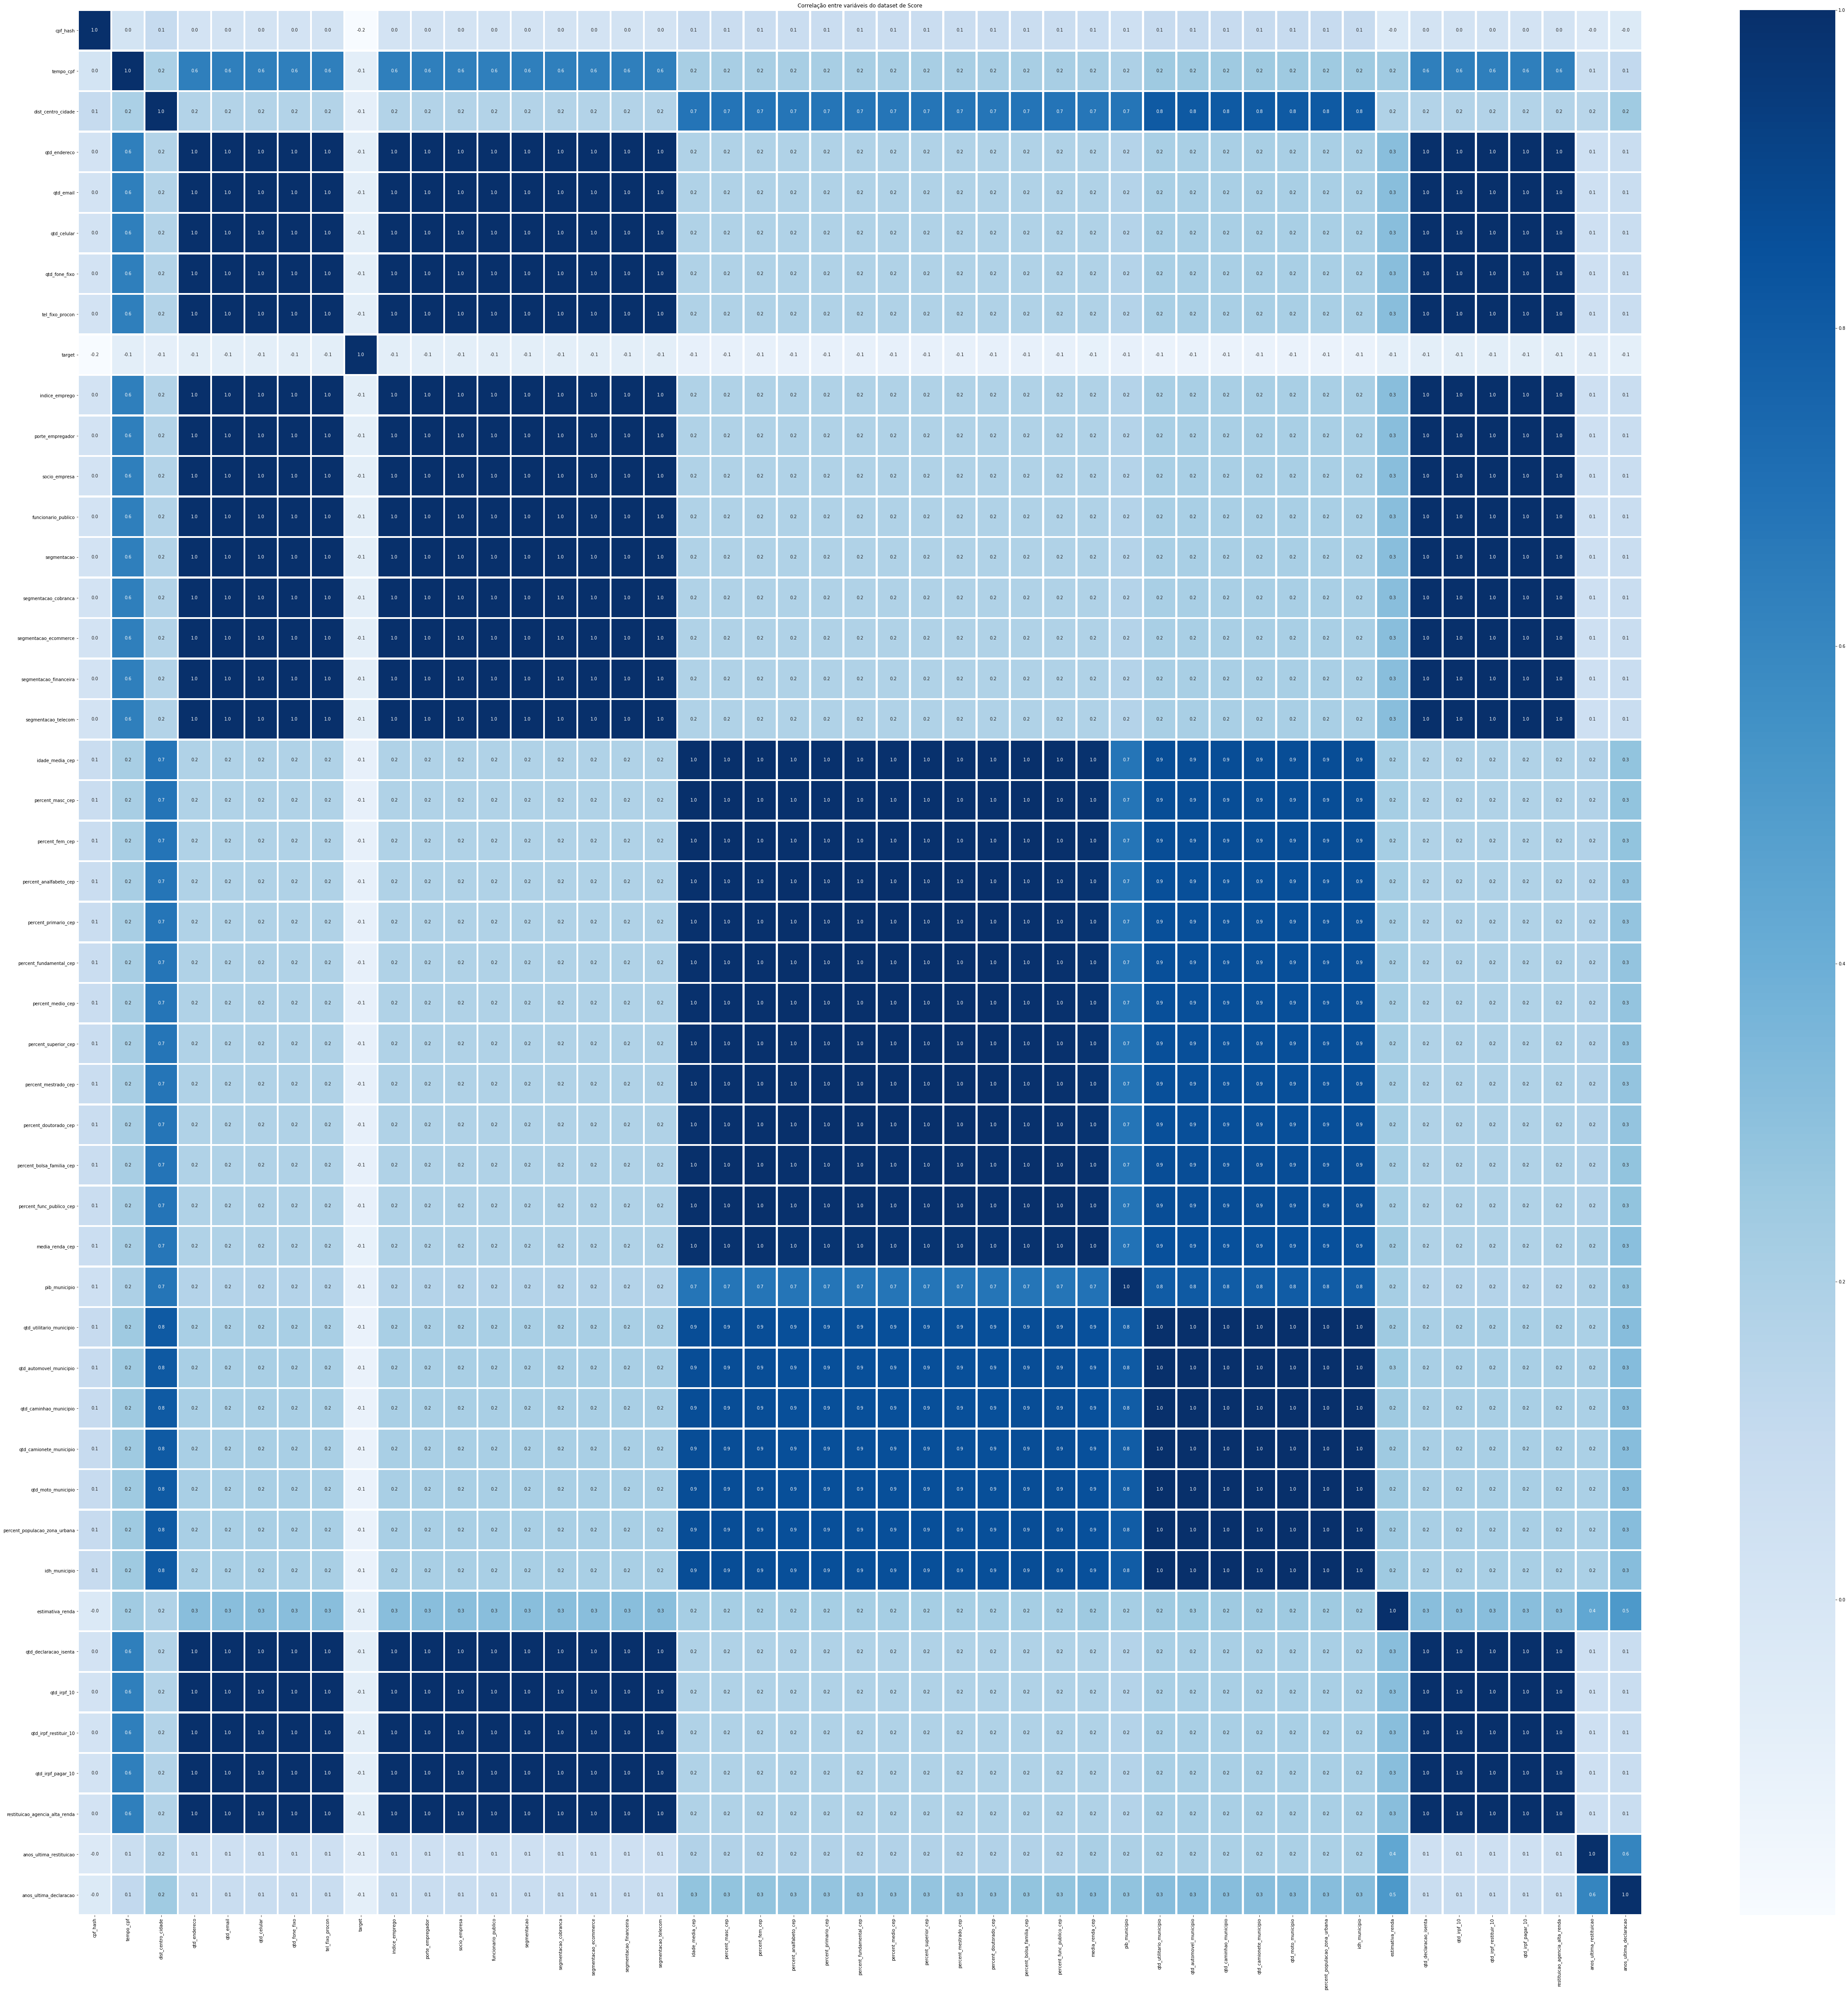

In [15]:
# Correlação entre variaveis
fig, ax = plt.subplots(figsize=(80,80))
sns.heatmap(df.corr(),
            annot = True,
            fmt = '.1f',
            cmap='Blues',
            linewidths=3.5,
            ax=ax)
plt.title('Correlação entre variáveis do dataset de Score')
plt.show()

In [16]:
# Selecionando artibutos que não tenham correlação >= que 0.7 entre si
df_selecao = df[[ 'cpf_hash', 'estimativa_renda', 'anos_ultima_restituicao', 
                 'anos_ultima_declaracao',  'segmentacao_financeira', 'safra', 'target']]

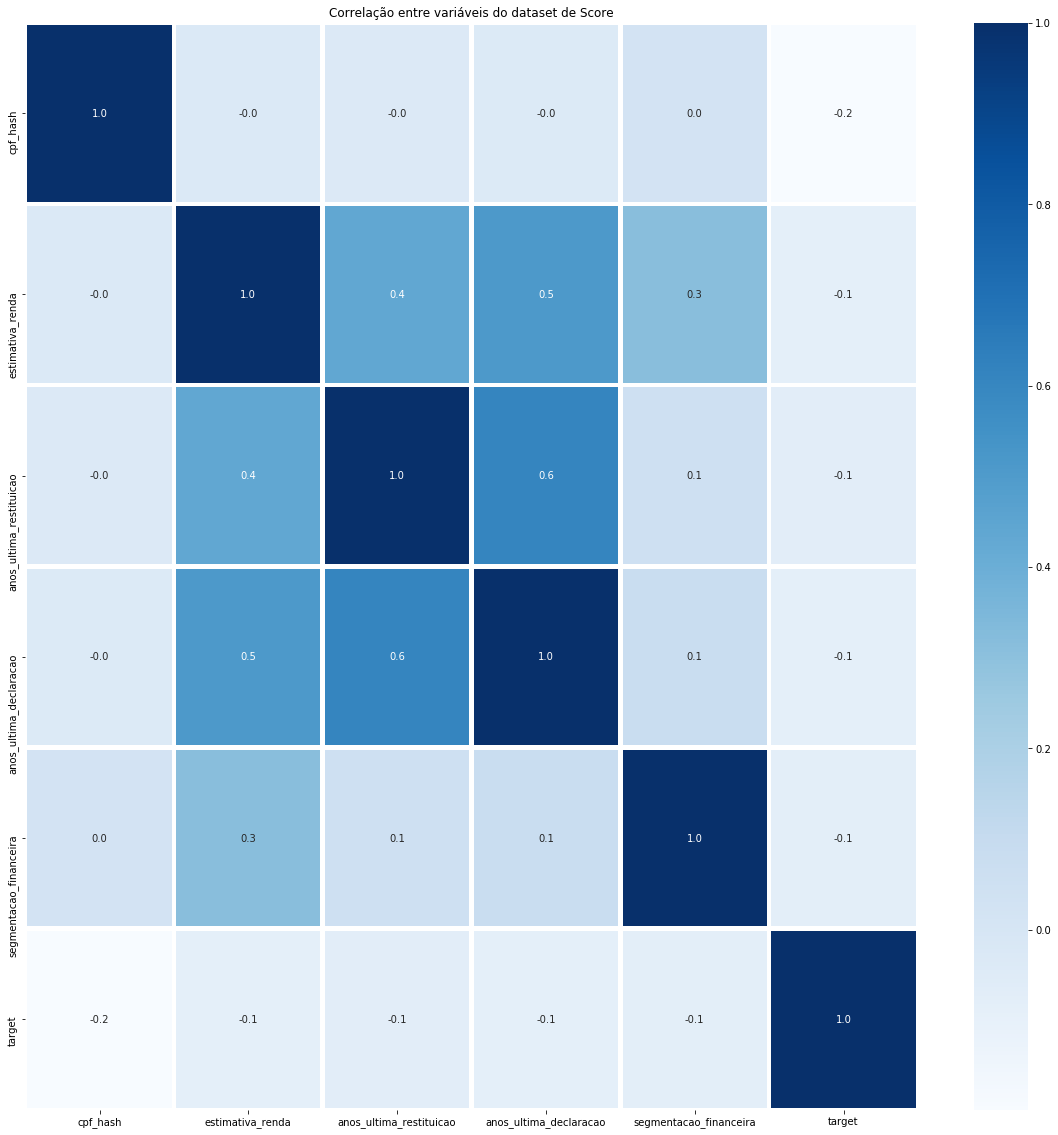

In [17]:
# Correlação entre variaveis
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(df_selecao.corr(),
            annot = True,
            fmt = '.1f',
            cmap='Blues',
            linewidths=3.5,
            ax=ax)
plt.title('Correlação entre variáveis do dataset de Score')
plt.show()

In [19]:
# Verificando novo dataset
df_selecao.head()

,cpf_hash,estimativa_renda,anos_ultima_restituicao,anos_ultima_declaracao,segmentacao_financeira,safra,target
0,217413,900,-9998,-9998,0,TESTE,0.0
1,659712,400,-9998,12,0,TESTE,0.0
2,558518,6000,-9998,-9998,1,TESTE,0.0
3,622015,1000,-9998,-9998,1,TESTE,0.0
4,241872,20000,8,4,0,TREINO,0.0


In [20]:
df_selecao.shape

(438924, 7)

## Separando os datasets em treino e testes

In [34]:
#gerando o dataset teste
df_test = df_selecao.loc[df['safra']== 'TESTE']

In [35]:
#gerando o dataset treino
df_train = df_selecao.loc[df['safra']== 'TREINO']

In [36]:
# Visualizando dataset de teste
df_test.head()

,cpf_hash,estimativa_renda,anos_ultima_restituicao,anos_ultima_declaracao,segmentacao_financeira,safra,target
0,217413,900,-9998,-9998,0,TESTE,0.0
1,659712,400,-9998,12,0,TESTE,0.0
2,558518,6000,-9998,-9998,1,TESTE,0.0
3,622015,1000,-9998,-9998,1,TESTE,0.0
7,595874,400,-9998,-9998,0,TESTE,0.0


In [37]:
# Visualizando dataset de treino
df_train.head()

,cpf_hash,estimativa_renda,anos_ultima_restituicao,anos_ultima_declaracao,segmentacao_financeira,safra,target
4,241872,20000,8,4,0,TREINO,0.0
5,119525,1000,-9998,-9998,0,TREINO,0.0
6,325014,900,-9998,-9998,0,TREINO,1.0
10,219233,1000,-9998,-9998,0,TREINO,0.0
12,302740,900,-9998,-9998,0,TREINO,0.0


## Validando integridade da base

In [56]:
# Médias a comparar dataset testes
test_cpf_hash = 467689.449135374
test_estimativa_renda = 2875.346941196
test_anos_ultima_restituicao = -8414.45462438029
test_anos_ultima_declaracao = -6629.92000379533
test_segmentacao_financeira = -95.0681025689683
test_target = 0.0398700097255497

print('Validando integridade da base: ')
print('Test => cpf_hash is checked: ',round(test_cpf_hash) == round(df_test['cpf_hash'].mean()))
print('Test => estimativa_renda is checked: ',
      round(test_estimativa_renda) == round(df_test['estimativa_renda'].mean()))
print('Test => anos_ultima_restituicao is checked: ',
      round(test_anos_ultima_restituicao) == round(df_test['anos_ultima_restituicao'].mean()))
print('Test => anos_ultima_declaracao is checked: ',
      round(test_anos_ultima_declaracao) == round(df_test['anos_ultima_declaracao'].mean()))
print('Test => segmentacao_financeira is checked: ',
      round(test_segmentacao_financeira) == round(df_test['segmentacao_financeira'].mean()))
print('Test => target is checked: ',
      round(test_target) == round(df_test['target'].mean()))

Validando integridade da base: 
Test => cpf_hash is checked:  True
Test => estimativa_renda is checked:  True
Test => anos_ultima_restituicao is checked:  True
Test => anos_ultima_declaracao is checked:  True
Test => segmentacao_financeira is checked:  True
Test => target is checked:  True


In [60]:
# Médias a comparar dataset treino
train_cpf_hash = 191491.349379106
train_estimativa_renda = 2977.42982129315
train_anos_ultima_restituicao = -8285.7530189928
train_anos_ultima_declaracao = -6431.86532333358
train_segmentacao_financeira = -160.085022727372
train_target = 0.148466505069277

print('Validando integridade da base: ')
print('Test => cpf_hash is checked: ',round(train_cpf_hash) == round(df_train['cpf_hash'].mean()))
print('Test => estimativa_renda is checked: ',
      round(train_estimativa_renda) == round(df_train['estimativa_renda'].mean()))
print('Test => anos_ultima_restituicao is checked: ',
      round(train_anos_ultima_restituicao) == round(df_train['anos_ultima_restituicao'].mean()))
print('Test => anos_ultima_declaracao is checked: ',
      round(train_anos_ultima_declaracao) == round(df_train['anos_ultima_declaracao'].mean()))
print('Test => segmentacao_financeira is checked: ',
      round(train_segmentacao_financeira) == round(df_train['segmentacao_financeira'].mean()))
print('Test => target is checked: ', round(train_target) == round(df_train['target'].mean()))

Validando integridade da base: 
Test => cpf_hash is checked:  True
Test => estimativa_renda is checked:  True
Test => anos_ultima_restituicao is checked:  True
Test => anos_ultima_declaracao is checked:  True
Test => segmentacao_financeira is checked:  True
Test => target is checked:  True
